# Wrap-up lab

This lab goes through some of the topics seen during this course.
More advanced topics are tackled in parts II and III.

## Part I. Convolutional neural nets

**Question 1.** Edit the code below to make sure CIFAR-10 image datasets are properly prepared to feed a 
convolutional neural net.
CIFAR-10 is an image classification dataset made of 32x32 color images.

In [1]:
import keras_core as keras
from keras.datasets import cifar10
from keras.utils import to_categorical

def prepare_small_cifar10():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype(float)[::2]  # Subsampling the dataset: do not edit
    x_test = x_test.astype(float)[::2]  # Subsampling the dataset: do not edit
    
    x_train /= 255.
    x_test /= 255.
    
    y_train = to_categorical(y_train)[::2]  # Subsampling the dataset: do not edit
    y_test = to_categorical(y_test)[::2]  # Subsampling the dataset: do not edit
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = prepare_small_cifar10()
print(x_train.max(), x_train.min())

Using TensorFlow backend
1.0 0.0


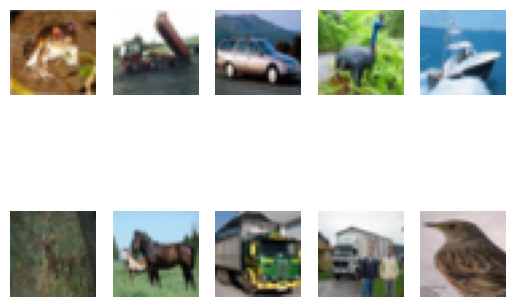

In [2]:
import matplotlib.pyplot as plt

for idx in range(10):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_train[idx])
    plt.axis("off")

**Question 2.** Implement the model below using `keras`. 
If some hyper-parameters are not specified, you are free to set them as you think is best.


![leNet model](https://raw.githubusercontent.com/rtavenar/deep-notebooks/main/assets/convnet_fig.png)

In [3]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    InputLayer((32, 32, 3)),
    Conv2D(filters=6, kernel_size=(5, 5), padding="valid", activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(units=64, activation="relu"),
    Dense(units=10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

2023-07-18 15:29:51.453683: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-07-18 15:29:51.453705: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-07-18 15:29:51.453710: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-07-18 15:29:51.453741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-18 15:29:51.453755: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-07-18 15:29:52.376465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


248/250 [============================>.] - ETA: 0s - loss: 1.8318 - accuracy: 0.3310

2023-07-18 15:29:55.664151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 4s 13ms/step - loss: 1.8292 - accuracy: 0.3318 - val_loss: 1.5951 - val_accuracy: 0.4288
Epoch 2/10
250/250 [==============================] - 2s 10ms/step - loss: 1.5523 - accuracy: 0.4394 - val_loss: 1.5268 - val_accuracy: 0.4480
Epoch 3/10
250/250 [==============================] - 2s 10ms/step - loss: 1.4674 - accuracy: 0.4746 - val_loss: 1.4492 - val_accuracy: 0.4778
Epoch 4/10
250/250 [==============================] - 2s 10ms/step - loss: 1.4288 - accuracy: 0.4919 - val_loss: 1.4579 - val_accuracy: 0.4724
Epoch 5/10
250/250 [==============================] - 3s 10ms/step - loss: 1.3955 - accuracy: 0.5059 - val_loss: 1.4738 - val_accuracy: 0.4716
Epoch 6/10
250/250 [==============================] - 2s 10ms/step - loss: 1.3841 - accuracy: 0.5125 - val_loss: 1.3772 - val_accuracy: 0.5072
Epoch 7/10
250/250 [==============================] - 2s 10ms/step - loss: 1.3871 - accuracy: 0.5151 - val_loss: 1.3721 - val_accuracy: 0.5234
Epoch 8/10

**Question 3.** We wonder whether the last hidden layer (made of 64 neurons) is really necessary.
Set up a way to properly compare the previous model with a model that would not have this layer.
What can you conclude?

In [4]:
model_reduit = Sequential([
    InputLayer((32, 32, 3)),
    Conv2D(filters=6, kernel_size=(5, 5), padding="valid", activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(units=10, activation="softmax")
])
model_reduit.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_reduit.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
 11/250 [>.............................] - ETA: 2s - loss: 2.2999 - accuracy: 0.1209

2023-07-18 15:30:19.071334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 1.8774 - accuracy: 0.3273

2023-07-18 15:30:21.418137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 3s 10ms/step - loss: 1.8774 - accuracy: 0.3273 - val_loss: 1.6467 - val_accuracy: 0.4076
Epoch 2/10
250/250 [==============================] - 2s 9ms/step - loss: 1.5273 - accuracy: 0.4601 - val_loss: 1.4601 - val_accuracy: 0.4812
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 1.3893 - accuracy: 0.5120 - val_loss: 1.3990 - val_accuracy: 0.4964
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 1.3103 - accuracy: 0.5378 - val_loss: 1.2959 - val_accuracy: 0.5456
Epoch 5/10
250/250 [==============================] - 2s 9ms/step - loss: 1.2426 - accuracy: 0.5690 - val_loss: 1.2546 - val_accuracy: 0.5586
Epoch 6/10
250/250 [==============================] - 2s 10ms/step - loss: 1.1929 - accuracy: 0.5851 - val_loss: 1.2381 - val_accuracy: 0.5646
Epoch 7/10
250/250 [==============================] - 3s 10ms/step - loss: 1.1572 - accuracy: 0.5976 - val_loss: 1.2378 - val_accuracy: 0.5640
Epoch 8/10
250

**Question 4.** You might have seen a slight overfitting with the model of question 2.
Set up a way to prevent this overfitting and see how it impacts the generalization performance of the model.

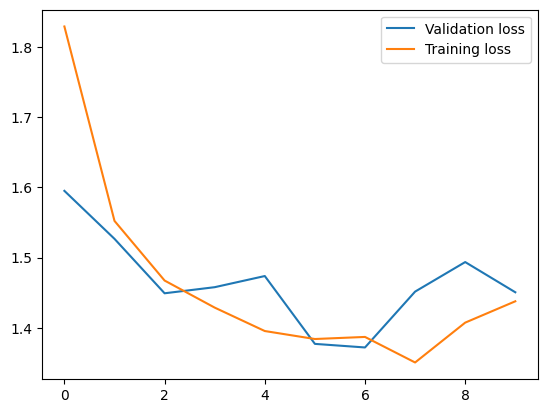

In [5]:
import matplotlib.pyplot as plt

plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

In [6]:
from keras.layers import Dropout
from keras.regularizers import l2

model = Sequential([
    InputLayer((32, 32, 3)),
    Conv2D(filters=6, kernel_size=(5, 5), padding="valid", activation="relu"),
    Dropout(rate=0.2),
    MaxPool2D(pool_size=2),
    Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation="relu"),
    Dropout(rate=0.2),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(units=64, activation="relu", kernel_regularizer=l2(1e-4)),
    Dropout(rate=0.2),
    Dense(units=10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Epoch 1/10


2023-07-18 15:30:44.382285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


249/250 [============================>.] - ETA: 0s - loss: 1.9625 - accuracy: 0.2791

2023-07-18 15:30:47.843670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 4s 15ms/step - loss: 1.9615 - accuracy: 0.2794 - val_loss: 1.7091 - val_accuracy: 0.3968
Epoch 2/10
250/250 [==============================] - 3s 13ms/step - loss: 1.6767 - accuracy: 0.3906 - val_loss: 1.6198 - val_accuracy: 0.4308
Epoch 3/10
250/250 [==============================] - 3s 13ms/step - loss: 1.5745 - accuracy: 0.4341 - val_loss: 1.4857 - val_accuracy: 0.4724
Epoch 4/10
250/250 [==============================] - 3s 14ms/step - loss: 1.5232 - accuracy: 0.4630 - val_loss: 1.4453 - val_accuracy: 0.4900
Epoch 5/10
250/250 [==============================] - 3s 13ms/step - loss: 1.4758 - accuracy: 0.4854 - val_loss: 1.3852 - val_accuracy: 0.5114
Epoch 6/10
250/250 [==============================] - 3s 13ms/step - loss: 1.4644 - accuracy: 0.4894 - val_loss: 1.4344 - val_accuracy: 0.4914
Epoch 7/10
250/250 [==============================] - 3s 13ms/step - loss: 1.4942 - accuracy: 0.4824 - val_loss: 1.3703 - val_accuracy: 0.5194
Epoch 8/10

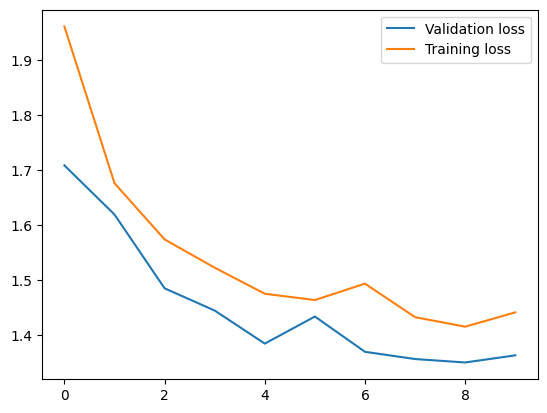

In [7]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question 5.** Use a ResNet50 model pre-trained on ImageNet to which you plug a single logistic 
regression layer and use it for this CIFAR-10 classification task.
What do you observe? Can you explain it?
What would you suggest?

In [8]:
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

x_train_processed = preprocess_input(x_train * 255)
x_test_processed = preprocess_input(x_test * 255)

model = Sequential([
    InputLayer((32, 32, 3)),
    ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3)), 
    Flatten(),
    Dense(units=10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train_processed, y_train, validation_data=(x_test_processed, y_test), epochs=10, batch_size=100)

Epoch 1/10


2023-07-18 15:31:21.430603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 1.4037 - accuracy: 0.5552

2023-07-18 15:31:41.003803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 22s 67ms/step - loss: 1.4037 - accuracy: 0.5552 - val_loss: 5.9370 - val_accuracy: 0.4328
Epoch 2/10
250/250 [==============================] - 16s 64ms/step - loss: 1.0951 - accuracy: 0.6632 - val_loss: 2.7994 - val_accuracy: 0.5880
Epoch 3/10
250/250 [==============================] - 16s 63ms/step - loss: 0.7003 - accuracy: 0.7598 - val_loss: 0.9792 - val_accuracy: 0.6954
Epoch 4/10
250/250 [==============================] - 16s 64ms/step - loss: 0.8607 - accuracy: 0.7353 - val_loss: 279.8866 - val_accuracy: 0.1568
Epoch 5/10
250/250 [==============================] - 16s 65ms/step - loss: 1.3299 - accuracy: 0.6047 - val_loss: 1.0852 - val_accuracy: 0.6310
Epoch 6/10
250/250 [==============================] - 16s 65ms/step - loss: 1.0398 - accuracy: 0.6744 - val_loss: 3.2736 - val_accuracy: 0.4584
Epoch 7/10
250/250 [==============================] - 17s 67ms/step - loss: 1.0606 - accuracy: 0.6596 - val_loss: 1.5018 - val_accuracy: 0.5914
E

## Part II. Multi-input / multi-output models

It sometimes happen that one wants to either feed a model with multiple inputs (_e.g._ an image and its 
caption) or predict several aspects of a sample, for which multiple outputs will be required.
In this context, `keras`' Sequential model cannot be used anymore, but other options exist, in what is 
called `keras`' functional API.

The basic idea behind this functional API is that the model will be defined by providing placeholders
for its inputs and outputs.
If the outputs are defined in such a way that they are computed from the inputs, the computation graph 
will be built automatically by `keras`.

For example, in the code below:

```python
from keras.models import Model
from keras.layers import Input, Dense

layer1 = Dense(units=20, activation="relu")
layer2 = Dense(units=30, activation="relu")
layer3 = Dense(units=1, activation="sigmoid")

inputs = Input(input_shape=(d, ))
hidden1 = layer1(inputs)
hidden2 = layer2(hidden1)
outputs = layer3(hidden2)

model = Model(inputs, outputs)
```

In this piece of code, we define the layers we need and then use them as if they were simple functions.
The model is finally defined as connecting the `inputs` to the `outputs`.
Here, if we had several inputs, we could have provided a list of them and, similarly, if we had
several outputs, they could be passed as a list.
Compilation and fit of such models are very similar to what we had with the `Sequential` class, except 
that:
* at fit time, the correct number of inputs / outputs should be passed and inputs (resp. outputs) should 
be gathered in lists just as what was done at the model definition step;
* at compile time, if several outputs are provided, several losses should be passed, as in the following example:

```python
losses = ["categorical_crossentropy", "binary_crossentropy"]
loss_weights = [1., 1.]
model.compile(optimizer="adam", loss=losses, loss_weights=loss_weights, metrics=["accuracy"])
```

**Question 6.** The code below loads a version of the MNIST dataset in which some digits are rotated. The goal is to both recognize the digit (information stored in `y_*`) and whether or not it is rotated 
(information stored in `y_rot_*`).
Implement a neural network that 2 blocks (convolution + pooling) that provide a joint latent 
representation for the image and for each output a single dense layer is plugged to this joint 
representation.

In [10]:
import numpy
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.image import rot90

numpy.random.seed(0)

def batch_rotate(images, indices):
    images_with_channel = images[:, :, :, numpy.newaxis]
    images_with_channel[indices] = rot90(images_with_channel[indices])
    return images_with_channel / 255.

def prepare_mnist():
    step = 3
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    rotate_train = numpy.random.choice(2, size=x_train.shape[0]).astype(bool)
    rotate_test = numpy.random.choice(2, size=x_test.shape[0]).astype(bool)
    x_train = batch_rotate(x_train, rotate_train)[::step]
    x_test = batch_rotate(x_test, rotate_test)[::step]
    y_train = to_categorical(y_train)[::step]
    y_test = to_categorical(y_test)[::step]
    rotate_train = rotate_train.reshape((-1, 1))[::step]
    rotate_test = rotate_test.reshape((-1, 1))[::step]
    return x_train, x_test, y_train, y_test, rotate_train, rotate_test
  
x_train, x_test, y_train, y_test, y_rot_train, y_rot_test = prepare_mnist()

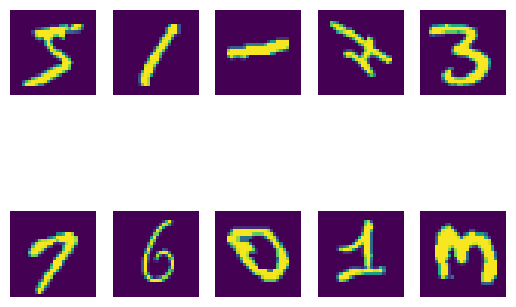

In [11]:
for idx in range(10):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_train[idx])
    plt.axis("off")

In [12]:
from keras.layers import Input
from keras.models import Model

model_conv = Sequential([
    InputLayer((28, 28, 1)),
    Conv2D(10, kernel_size=5, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(50, kernel_size=5, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten()
])

classif_rot = Dense(1, activation="sigmoid")
classif_chiffre = Dense(10, activation="softmax")

inputs = Input(shape=(28, 28, 1))
repr_latente = model_conv(inputs)
sortie_rot = classif_rot(repr_latente)
sortie_chiffre = classif_chiffre(repr_latente)

model = Model(inputs, [sortie_rot, sortie_chiffre])

losses = ["binary_crossentropy", "categorical_crossentropy"]
loss_weights = [1., 1.]
model.compile(optimizer="adam", loss=losses, loss_weights=loss_weights, metrics=["accuracy"])
model.fit(x_train, [y_rot_train, y_train], validation_data=(x_test, [y_rot_test, y_test]), epochs=10, batch_size=100)


Epoch 1/10


2023-07-18 15:34:51.375843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


198/200 [============================>.] - ETA: 0s - loss: 1.0379 - dense_6_loss: 0.1875 - dense_7_loss: 0.8504 - dense_6_accuracy: 0.9376 - dense_7_accuracy: 0.7468

2023-07-18 15:34:54.827685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 4s 17ms/step - loss: 1.0321 - dense_6_loss: 0.1864 - dense_7_loss: 0.8458 - dense_6_accuracy: 0.9378 - dense_7_accuracy: 0.7480 - val_loss: 0.3974 - val_dense_6_loss: 0.0614 - val_dense_7_loss: 0.3360 - val_dense_6_accuracy: 0.9814 - val_dense_7_accuracy: 0.8995
Epoch 2/10
200/200 [==============================] - 3s 14ms/step - loss: 0.3383 - dense_6_loss: 0.0562 - dense_7_loss: 0.2822 - dense_6_accuracy: 0.9802 - dense_7_accuracy: 0.9180 - val_loss: 0.2483 - val_dense_6_loss: 0.0471 - val_dense_7_loss: 0.2012 - val_dense_6_accuracy: 0.9841 - val_dense_7_accuracy: 0.9370
Epoch 3/10
200/200 [==============================] - 3s 14ms/step - loss: 0.2377 - dense_6_loss: 0.0392 - dense_7_loss: 0.1985 - dense_6_accuracy: 0.9861 - dense_7_accuracy: 0.9422 - val_loss: 0.1867 - val_dense_6_loss: 0.0266 - val_dense_7_loss: 0.1601 - val_dense_6_accuracy: 0.9907 - val_dense_7_accuracy: 0.9469
Epoch 4/10
200/200 [==============================] - 3s 14m

Use the code below to visualize your predictions.

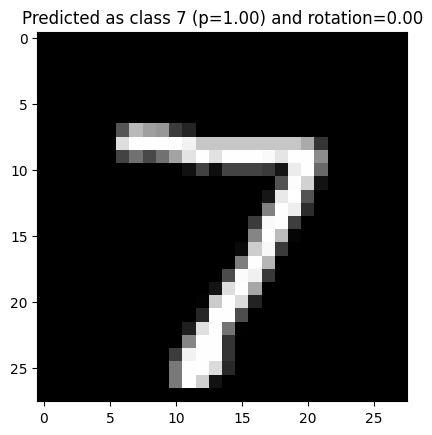

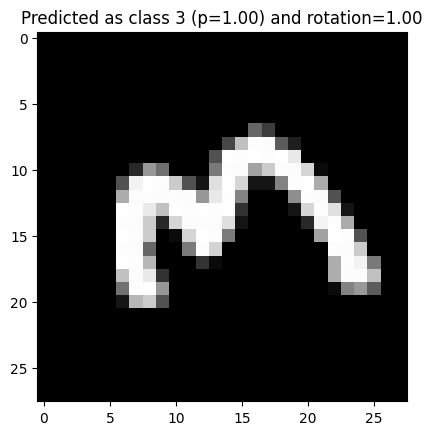

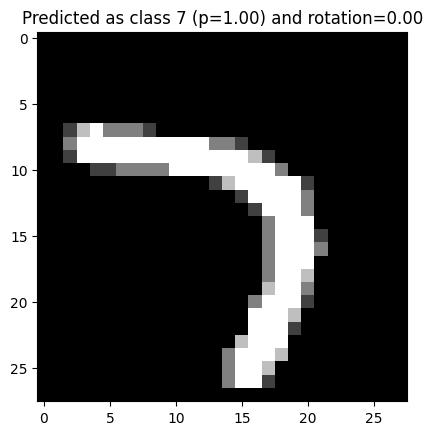

In [13]:
import matplotlib.pyplot as plt

def plot_rot_mnist_preds(img, pred_class, pred_rot):
    plt.figure()
    plt.imshow(img.reshape((28, 28)), cmap="gray")
    plt.title("Predicted as class %d (p=%.2f) and rotation=%.2f" % 
        (pred_class.argmax(), pred_class[pred_class.argmax()], pred_rot)
    )

preds_rot, preds_class = model(x_test)
list_idx = [0, 10, 20]
for idx in list_idx:
    plot_rot_mnist_preds(x_test[idx], preds_class[idx].numpy(), preds_rot[idx].numpy())


## Part III. Setting constraints on weights

It can happen that a model's parameters have some actual real-world meaning.
In this context, it could occur that you would want to set constraints on these weights (_e.g._ non-negativity, unit-norm, etc.).

To do so, `keras` layers accept a `kernel_constraint` parameter, as described 
[here](https://keras.io/api/layers/constraints/).

This parameter accepts either one of the provided constraints (`NonNeg`, `UnitNorm`, etc.) or a function
that takes a weight tensor as input and returns a transformed version that fulfills the constraint.

**Question 7.** Suppose we are given a dataset for which we know the outputs are generated as a
linear combination of the inputs in which the coefficients are positive and sum to one.
Implement a model that could estimate these weights from input-output data.



In [14]:
def gen_data():
    n_samples = 1000
    d = 10
    X = numpy.random.randn(n_samples, d)
    secret_weights = numpy.random.uniform(size=d)
    secret_weights /= secret_weights.sum()

    print("Secret weights are:")
    print(secret_weights)

    y = X.dot(secret_weights.reshape((-1, 1))) + .1 * numpy.random.randn(n_samples, 1)
    return X, y

X_train, y_train = gen_data()

Secret weights are:
[0.08452115 0.09754729 0.11217269 0.13606077 0.14453163 0.08304212
 0.10471468 0.08017007 0.10614902 0.05109059]


In [15]:
print(X_train.shape, y_train.shape)

(1000, 10) (1000, 1)


In [16]:
from keras.constraints import Constraint
from tensorflow.nn import relu
from tensorflow.math import reduce_sum


class PositifSomme1(Constraint):
  """Constrains weight tensors to be positive and of unit sum."""
  def __call__(self, w):
    w = relu(w)
    return w / reduce_sum(w)

model = Sequential([
  InputLayer((10, )),
  Dense(1, activation="linear", kernel_constraint=PositifSomme1(), use_bias=False)
])
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10


2023-07-18 15:35:21.357487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 4ms/step - loss: 0.2478
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1162
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0899
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0691
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0420
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0331
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0221
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0187


In [17]:
print(model.layers[0].weights)
print(reduce_sum(model.layers[0].weights[0]))

[<tf.Variable 'dense_8/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[0.08263242],
       [0.09664829],
       [0.08924497],
       [0.13269411],
       [0.10065804],
       [0.08734874],
       [0.09152842],
       [0.10397159],
       [0.10462818],
       [0.11064529]], dtype=float32)>]
tf.Tensor(1.0, shape=(), dtype=float32)
